## Naive Bayes
Naive Bayes is a class of probabilistic classifiers, where they assign class labels to data instances, represented as vectors of feature values. Naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

In machine learning, a probabilistic classifier is a classifier that is able to predict, given an observation of an input, a probability distribution over a set of classes, rather than only outputting the most likely class that the observation should belong to. 

#### Do you know why Naive Bayes models are called "naive"?!

> Because this type of probabilistic classifiers are based on “naive” assumption of conditional independence between every pair of features ($F_i$) given the value of the class variable ($Y=y$).

#### How Naive Bayes work?
Given a problem instance to be classified, represented by a vector $\mathbf {F} =(f_{1},\ldots ,f_{n})$ representing some $n$ features (independent variables), it assigns to this instance probabilities $P(Y=y \mid f_1,\cdots,f_n)$ for each $m$ possible classes.

Using Bayes' theorem (note that in this theorem the features are dependent), the conditional probability can be decomposed as:
$$P(Y=y \mid f_1,\cdots,f_n) = \frac{P(y)P(f_1,\cdots,f_n \mid y)}{P(f_1,\cdots,f_n)}$$

Now the "naïve" conditional independence assumptions come into play: 
$$P(f_1,\cdots,f_n \mid y) = \prod_{i=1}^{n} P(f_i \mid y)$$

Therefore, the joint model can be expressed as (note that the probability of evidence, $Z=P(f_1,\cdots,f_n)$, is constant):
$$P(Y=y \mid f_1,\cdots,f_n) = \frac{P(y)\prod_{i=1}^{n} P(f_i \mid y)}{P(f_1,\cdots,f_n)} \propto P(y)\prod_{i=1}^{n} P(f_i \mid y)$$

#### Constructing a classifier from the probability model
For constructing a naive Bayes classifier, one common rule is to pick the class that is most probable; this is known as the Maximum A Posteriori (MAP) decision rule. 
$$\hat{y} = \argmax_y P(y)\prod_{i=1}^{n} P(f_i \mid y)$$

$P(y)$ is the prior over labels and can be estimated by the relative frequency of class in the training set. $P(f_i \mid y)$ is the likelihood of features given the label. The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of evidence--$P(f_i \mid y)$. 

#### Applications of Naive Bayes
The conditional independence assumption regarding evidence variables means that each distribution can be independently estimated as a one dimensional distribution and this avoids the curse of dimensionality. In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations (e.g., document classification and spam filtering). They require a small amount of training data to estimate the necessary parameters.

#### Benefits of using Naive Bayes
* They are fast learners!
* They provide straightforward probabilistic prediction, but do not rely on the estimated probabilities
* They are interpretable
* They have $n \times |F| \times |Y|$ tunable parameters which is linear with respect to the number of features
* They tend to work better in well separated classes and high-dimensional data

In [21]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# In this classifier, the assumption is that data from each label is drawn from a simple Gaussian distribution. See above the discussions regarding the distribution of evidence.
from sklearn.naive_bayes import GaussianNB 

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

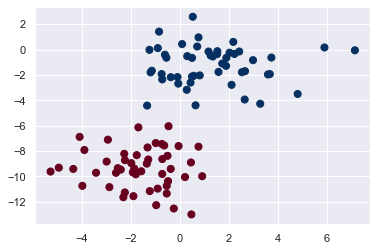

In [22]:
X, y = make_blobs(100,2,centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

[(-8.0, 8.0), (-15.0, 5.0)]

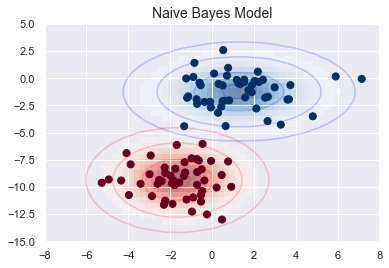

In [23]:
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

In [28]:
gnb = GaussianNB()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)
# Let's build the gaussian naive bayes model
model_gauss_nb = gnb.fit(X_train, y_train)
# Now let's get y_hat
y_pred = model_gauss_nb.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 80 points : 0


In [29]:
# Now let's try a text dataset
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()

In [34]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [47]:
cat = ['alt.atheism', 'sci.space']
train = fetch_20newsgroups(subset='train', categories=cat)
test = fetch_20newsgroups(subset='test', categories=cat)


print(train.data[0])
print(train.target[0])

print(train.data[1])
print(train.target[1])

From: bil@okcforum.osrhe.edu (Bill Conner)
Subject: Re: Not the Omni!
Nntp-Posting-Host: okcforum.osrhe.edu
Organization: Okcforum Unix Users Group
X-Newsreader: TIN [version 1.1 PL6]
Lines: 18

Charley Wingate (mangoe@cs.umd.edu) wrote:
: 
: >> Please enlighten me.  How is omnipotence contradictory?
: 
: >By definition, all that can occur in the universe is governed by the rules
: >of nature. Thus god cannot break them. Anything that god does must be allowed
: >in the rules somewhere. Therefore, omnipotence CANNOT exist! It contradicts
: >the rules of nature.
: 
: Obviously, an omnipotent god can change the rules.

When you say, "By definition", what exactly is being defined;
certainly not omnipotence. You seem to be saying that the "rules of
nature" are pre-existant somehow, that they not only define nature but
actually cause it. If that's what you mean I'd like to hear your
further thoughts on the question.

Bill

0
From: jhwitten@cs.ruu.nl (Jurriaan Wittenberg)
Subject: Re: Magella

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [51]:
# Let's convert the content of each string into a vector of numbers. For this we will use the TF-IDF vectorizer, and create a pipeline that attaches it to a multinomial naive Bayes classifier
model_multinomial_nb = make_pipeline(TfidfVectorizer(), MultinomialNB())
model_multinomial_nb.fit(train.data, train.target)
y_pred = model_multinomial_nb.predict(test.data)

Text(89.18, 0.5, 'predicted label')

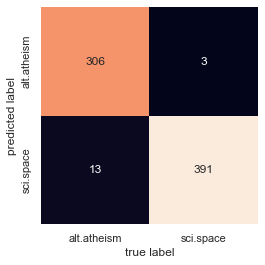

In [52]:
# Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator. Here we use confusion matrix between the true and predicted labels for the test data.
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [65]:
predicted_category = model_multinomial_nb.predict(['We are developing AI technologies to build an autonomous space lander'])
print(train.target_names[predicted_category[0]])

predicted_category = model_multinomial_nb.predict(['I do not believe in god!'])
print(train.target_names[predicted_category[0]])

sci.space
alt.atheism


## Naive Bayes Classifier From Scratch
Now let's try to construct a simple Naive Bayes model from scratch not using scikit-learn!

In [100]:
import pandas as pd
import numpy as np

# Create an empty dataframe
data = pd.DataFrame()

# Create our target variable
data['Covid'] = ['+','+','-','-','-','+','-','+']

# Create our feature variables
data['Age'] = [65,78,43,35,10,22,45,20]
data['Vaccinated'] = [0,1,1,1,0,0,1,0]
data['Gender'] = [0,0,1,0,0,1,1,1] # 0:male 1:female

# View the data
data

,Covid,Age,Vaccinated,Gender
0,+,65,0,0
1,+,78,1,0
2,-,43,1,1
3,-,35,1,0
4,-,10,0,0
5,+,22,0,1
6,-,45,1,1
7,+,20,0,1


In [74]:
# Create a function that calculates p(x | y):

def p_x_given_y(x, mean_y, variance_y):

    # Input the arguments into a probability density function
    p = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(x-mean_y)**2)/(2*variance_y))
    
    # return p
    return p

In [101]:
# Group the data by Covid and calculate the means of each feature
data_means = data.groupby('Covid').mean()
data_means

,Age,Vaccinated,Gender
Covid,,,
+,46.25,0.25,0.5
-,33.25,0.75,0.5


In [102]:
# Group the data by Covid and calculate the variance of each feature
data_variance = data.groupby('Covid').var()

# View the values
data_variance

,Age,Vaccinated,Gender
Covid,,,
+,878.916667,0.25,0.333333
-,258.916667,0.25,0.333333


In [103]:
# Priors
# Number of males
n_positive = data['Covid'][data['Covid'] == '+'].count()

# Number of males
n_negative = data['Covid'][data['Covid'] == '-'].count()

# Total rows
total_ppl = data['Covid'].count()
# Number of males divided by the total rows
P_positive = n_positive/total_ppl

# Number of females divided by the total rows
P_negative = n_negative/total_ppl

In [104]:
# Means for Covid positive
positive_age_mean = data_means['Age'][data_variance.index == '+'].values[0]
positive_vaccinated_mean = data_means['Vaccinated'][data_variance.index == '+'].values[0]
positive_gender_mean = data_means['Gender'][data_variance.index == '+'].values[0]

# Variance for Covid positive
positive_age_var = data_variance['Age'][data_variance.index == '+'].values[0]
positive_vaccinated_var = data_variance['Vaccinated'][data_variance.index == '+'].values[0]
positive_gender_var = data_variance['Gender'][data_variance.index == '+'].values[0]

# Means for Covid negative
negative_age_mean = data_means['Age'][data_variance.index == '-'].values[0]
negative_vaccinated_mean = data_means['Vaccinated'][data_variance.index == '-'].values[0]
negative_gender_mean = data_means['Gender'][data_variance.index == '-'].values[0]

# Variance for Covid negative
negative_age_var = data_variance['Age'][data_variance.index == '-'].values[0]
negative_vaccinated_var = data_variance['Vaccinated'][data_variance.index == '-'].values[0]
negative_gender_var = data_variance['Gender'][data_variance.index == '-'].values[0]

In [109]:
# Create an empty dataframe
person = pd.DataFrame()

# Create some feature values for this single row
person['Age'] = [6]
person['Vaccinated'] = [1]
person['Gender'] = [1]

# View the data 
person

,Age,Vaccinated,Gender
0,6,1,1


In [106]:
positive_vaccinated_var

0.25000000000000006

In [82]:
# If the ratio of data variance between dimensions is too small, it
# will cause numerical errors. To address this, we artificially
# boost the variance by epsilon, a small fraction of the standard
# deviation of the largest dimension.
var_smoothing=1e-9
epsilon = var_smoothing * np.var(data, axis=0).max()

positive_vaccinated_var += epsilon

/Users/pjamshidi/.conda/envs/deeplearning/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3700: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [110]:
# Numerator of the posterior if the unclassified observation is a Covid positive!
P_positive * p_x_given_y(person['Age'][0], positive_age_mean, positive_age_var) * p_x_given_y(person['Vaccinated'][0], positive_vaccinated_mean, positive_vaccinated_var) * p_x_given_y(person['Gender'][0], positive_gender_mean, positive_gender_var)


0.00032932049510428594

In [111]:
# Numerator of the posterior if the unclassified observation is a Covid negative!
P_negative * p_x_given_y(person['Age'][0], negative_age_mean, negative_age_var) * p_x_given_y(person['Vaccinated'][0], negative_vaccinated_mean, negative_vaccinated_var) * p_x_given_y(person['Gender'][0], negative_gender_mean, negative_gender_var)


0.0009880845289208706